# Interpolation with Radial Basis Functions

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

In [2]:
plot_x = np.linspace(-3, 3, 200)

In [3]:
np.random.seed(20)
centers = np.random.randn(10)*0.05 + np.linspace(-1.5, 1.5, 10)
centers = np.sort(centers)
centers

array([-1.45580534, -1.15687342, -0.81545651, -0.6171631 , -0.2209083 ,
        0.19465148,  0.54697347,  0.78440928,  1.19182151,  1.52032072])

In [4]:
radius = 0.3

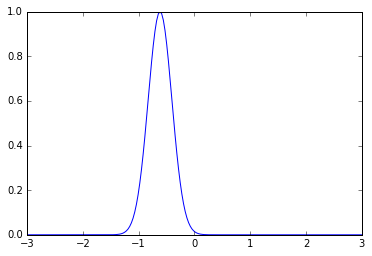

In [5]:
def radial_basis_function(x, i):
    return np.exp(-(x-centers[i])**2/radius**2)

pt.plot(plot_x, radial_basis_function(plot_x, 3))

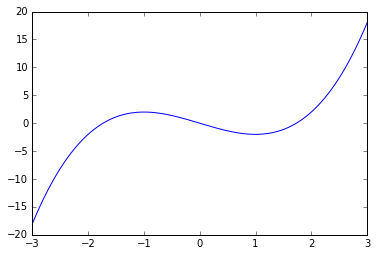

In [6]:
def f(x): return x**3 - 3*x

pt.plot(plot_x, f(plot_x))

Let's build a Vandermonde matrix at the centers:

In [7]:
nodes = centers

V = np.array([
    radial_basis_function(nodes, i)
    for i in range(len(centers))
    ]).T

Find the coefficients:

In [8]:
#clear
coeffs = la.solve(V, f(nodes))

Find the interpolant:

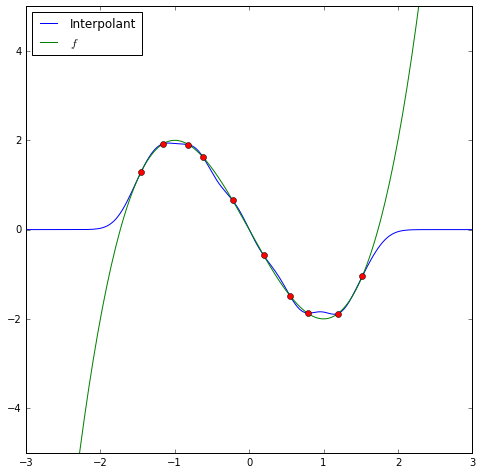

In [9]:
interpolant = 0
for i in range(len(centers)):
    interpolant += coeffs[i] * radial_basis_function(plot_x, i)

pt.figure(figsize=(8,8))
pt.ylim([-5,5])
pt.plot(plot_x, interpolant, label="Interpolant")
pt.plot(plot_x, f(plot_x), label="$f$")
pt.plot(centers, f(centers), "o")
pt.legend(loc="best")

* Play around with the radius of the RBFs
* Play with node placement